# BANGLORE HOUSE PRICE DATA 

 ### DATASET SOURCE
    
### https://www.kaggle.com/code/ameythakur20/bangalore-house-price-prediction-model/input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')

## DATA UNDERSTANDING

In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

##  DATA PREPERATION


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
#Rename our columns
df=df.rename(columns={'area_type':'Area_Type',
                   'availability':'Availability',
                   'location':'Location',
                    'size':'Size', 'society':'Society',
                    'total_sqft':'Total_Sqft', 
                    'bath':'Bath', 'balcony':'Balcony',
                    'price':'Price'})
df.head()   

,Area_Type,Availability,Location,Size,Society,Total_Sqft,Bath,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df.Area_Type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [11]:
df.Area_Type.value_counts()

Area_Type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [12]:
df.Availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [13]:
df1=df.copy()

In [14]:
df1['Size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df1['Size'].value_counts()

Size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [16]:
df1[df1['Size'].isnull()]

,Area_Type,Availability,Location,Size,Society,Total_Sqft,Bath,Balcony,Price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [17]:
df1['Size'].fillna('0',inplace=True)

In [18]:
temp=df1['Size'].str.split(" ",expand=True)
df1['Room']=temp[0].copy()
df1['Room_Type']=temp[1].copy()
df1.head()

,Area_Type,Availability,Location,Size,Society,Total_Sqft,Bath,Balcony,Price,Room,Room_Type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,BHK


In [19]:
len(df1.Society.unique()) 

2689

In [20]:
df2=df1.copy()

In [21]:
df2.drop('Society',axis=1,inplace=True)

In [22]:
len(df2.Location.unique())

1306

In [23]:
location_stat=df2.groupby("Location")["Location"].count().sort_values(ascending=False)
location_stat[location_stat.values<10]

Location
Peenya                     9
B Narayanapura             9
Vishwanatha Nagenahalli    9
Volagerekallahalli         9
Kaverappa Layout           9
                          ..
 Banaswadi                 1
Kanakadasa Layout          1
Kanakapur main road        1
Kanakapura  Rod            1
whitefiled                 1
Name: Location, Length: 1052, dtype: int64

In [24]:
location_stat_less_than_10=location_stat[location_stat.values<10]

In [25]:
location_stat_less_than_10.index

Index(['Peenya', 'B Narayanapura', 'Vishwanatha Nagenahalli',
       'Volagerekallahalli', 'Kaverappa Layout', 'Banagiri Nagar',
       '4th Block Koramangala', '2nd Phase JP Nagar', 'Richmond Town',
       'Sector 1 HSR Layout',
       ...
       'KPC Layout', 'Kalasipalya', 'Kalhalli', 'Kalkere Channasandra',
       'Kamdhenu Nagar', ' Banaswadi', 'Kanakadasa Layout',
       'Kanakapur main road', 'Kanakapura  Rod', 'whitefiled'],
      dtype='object', name='Location', length=1052)

In [26]:
df2.Location=df2.Location.apply(lambda x:'Rare'if x in location_stat_less_than_10.index else x)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area_Type     13320 non-null  object 
 1   Availability  13320 non-null  object 
 2   Location      13319 non-null  object 
 3   Size          13320 non-null  object 
 4   Total_Sqft    13320 non-null  object 
 5   Bath          13247 non-null  float64
 6   Balcony       12711 non-null  float64
 7   Price         13320 non-null  float64
 8   Room          13320 non-null  object 
 9   Room_Type     13304 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


### EXPLORE Total-sqft FEATURE

In [28]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [29]:
df2[~df2['Total_Sqft'].apply(is_float)].head(10)

,Area_Type,Availability,Location,Size,Total_Sqft,Bath,Balcony,Price,Room,Room_Type
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4,BHK
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000,4,Bedroom
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500,4,Bedroom
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4,BHK
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2,BHK
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2,BHK
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2,BHK
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,1520 - 1740,NaN,NaN,74.820,3,BHK
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1,BHK
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2,BHK


In [30]:
def convert_sqrt_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [31]:
convert_sqrt_to_num('2166')

2166.0

In [32]:
convert_sqrt_to_num('2100-2850')

2475.0

In [33]:
convert_sqrt_to_num('34.46sq.Meter')

In [34]:
df3=df2.copy()

In [35]:
df3['Total_Sqft']=df3['Total_Sqft'].apply(convert_sqrt_to_num)
df3.head()

,Area_Type,Availability,Location,Size,Total_Sqft,Bath,Balcony,Price,Room,Room_Type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,BHK


In [36]:
df3.loc[30]

Area_Type       Super built-up  Area
Availability                  19-Dec
Location                   Yelahanka
Size                           4 BHK
Total_Sqft                    2475.0
Bath                             4.0
Balcony                          0.0
Price                          186.0
Room                               4
Room_Type                        BHK
Name: 30, dtype: object

In [37]:
df3.head()

,Area_Type,Availability,Location,Size,Total_Sqft,Bath,Balcony,Price,Room,Room_Type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,BHK


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area_Type     13320 non-null  object 
 1   Availability  13320 non-null  object 
 2   Location      13319 non-null  object 
 3   Size          13320 non-null  object 
 4   Total_Sqft    13274 non-null  float64
 5   Bath          13247 non-null  float64
 6   Balcony       12711 non-null  float64
 7   Price         13320 non-null  float64
 8   Room          13320 non-null  object 
 9   Room_Type     13304 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.0+ MB


In [39]:
df4=df3.copy()

In [40]:
#we can drop Size column  as we have already created 2 features out of it keeping all the information from it.

In [41]:
df4[df4["Room_Type"].isnull()]

,Area_Type,Availability,Location,Size,Total_Sqft,Bath,Balcony,Price,Room,Room_Type
579,Plot Area,Immediate Possession,Sarjapur Road,0,1800.0,NaN,NaN,34.185,0,None
1775,Plot Area,Immediate Possession,Rare,0,3817.0,NaN,NaN,124.000,0,None
2264,Plot Area,Immediate Possession,Banashankari,0,2400.0,NaN,NaN,460.000,0,None
2809,Plot Area,Immediate Possession,Sarjapur Road,0,1800.0,NaN,NaN,28.785,0,None
2862,Plot Area,Immediate Possession,Devanahalli,0,1950.0,NaN,NaN,46.800,0,None
5333,Plot Area,Immediate Possession,Devanahalli,0,3752.5,NaN,NaN,177.115,0,None
6423,Plot Area,Immediate Possession,Whitefield,0,2324.0,NaN,NaN,26.730,0,None
6636,Plot Area,Immediate Possession,Jigani,0,1500.0,NaN,NaN,25.490,0,None
6719,Plot Area,Immediate Possession,Hoskote,0,1730.0,NaN,NaN,28.545,0,None
7680,Plot Area,Immediate Possession,Kasavanhalli,0,5000.0,NaN,NaN,400.000,0,None


In [42]:
df4["Room_Type"].fillna("NA",inplace=True)

In [43]:
df4.drop("Size",axis=1,inplace=True)

## Exploratory Data Analysis

In [44]:
df5=df4.copy()

In [45]:
df5.head()

,Area_Type,Availability,Location,Total_Sqft,Bath,Balcony,Price,Room,Room_Type
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,BHK
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,BHK


<function matplotlib.pyplot.show(close=None, block=None)>

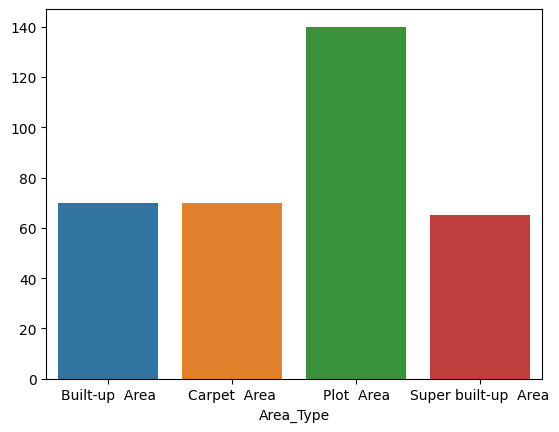

In [46]:
temp=df5.groupby("Area_Type")["Price"].median()
sns.barplot(x=temp.index,y=temp.values)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

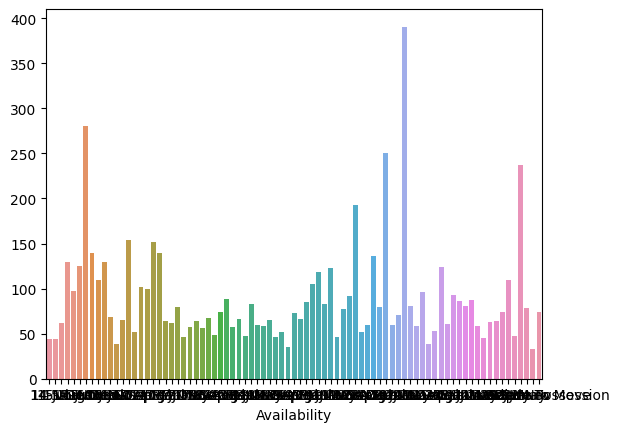

In [47]:
temp=df5.groupby("Availability")["Price"].median()
sns.barplot(x=temp.index,y=temp.values)
plt.show

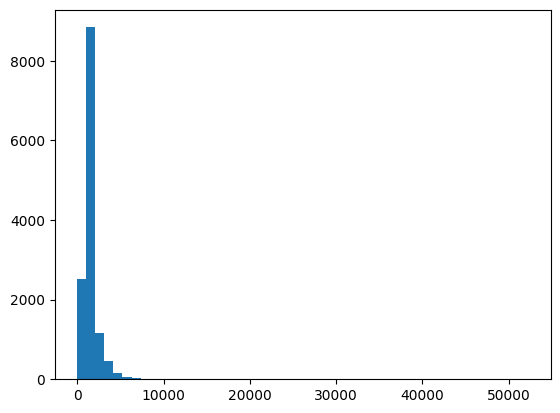

In [48]:
plt.hist(df5["Total_Sqft"],bins=50)
plt.show()

In [49]:
# The feature Total_sqft is right skewed.
# Most of the properties have areas less than 5000sq ft.

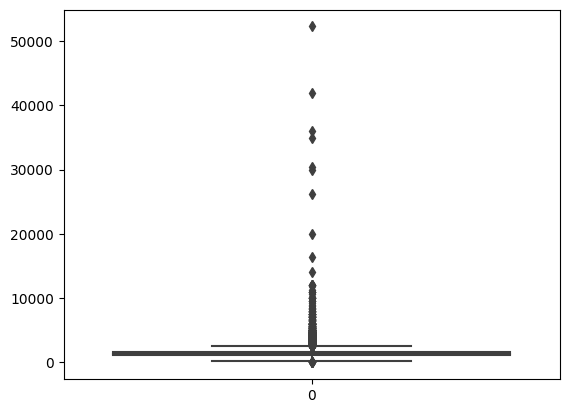

In [50]:
sns.boxplot(df5["Total_Sqft"])
plt.show()

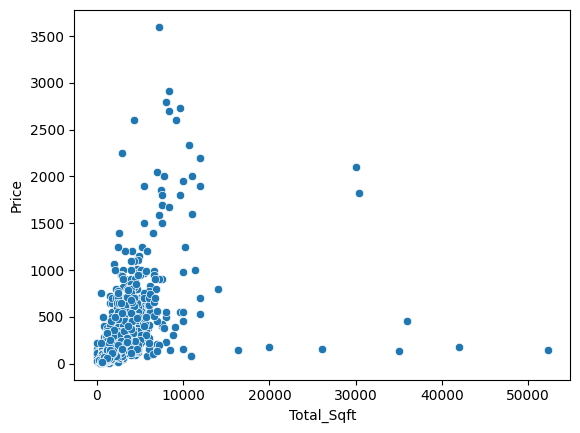

In [51]:
sns.scatterplot(x="Total_Sqft",y="Price",data=df5)
plt.show()

In [52]:
# As expected,the price of the property increases with the total area.

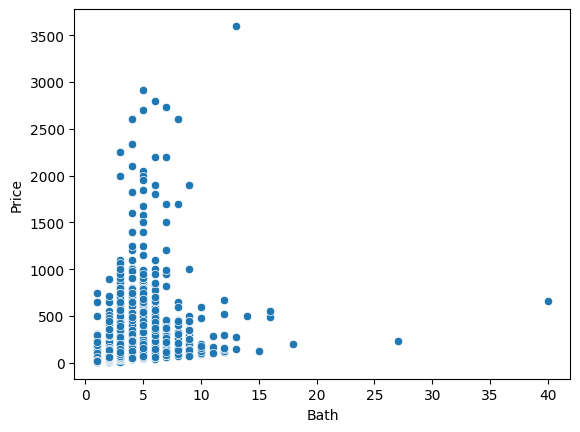

In [53]:
sns.scatterplot(x="Bath",y="Price",data=df5)
plt.show()

In [54]:
# Bath column doesn't show any significant direct impact on the price.

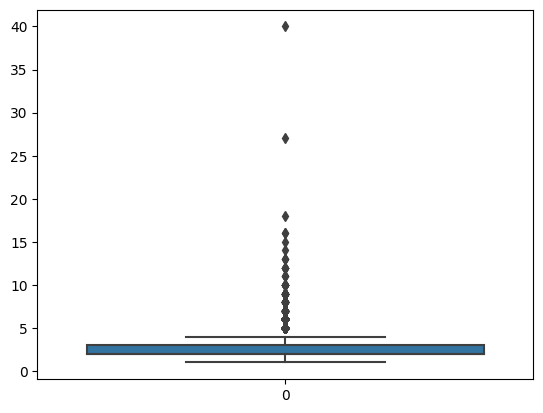

In [55]:
sns.boxplot(df5["Bath"])
plt.show()

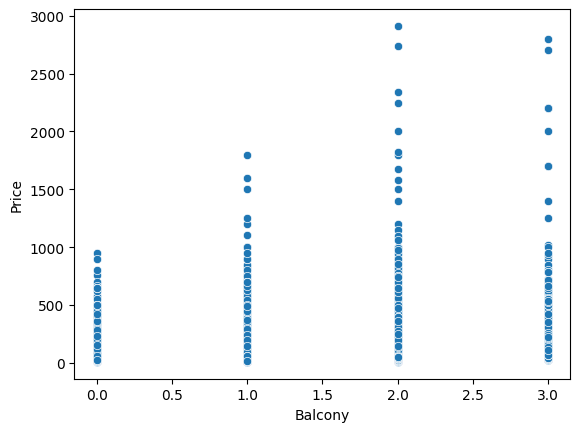

In [56]:
sns.scatterplot(x="Balcony",y="Price",data=df5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

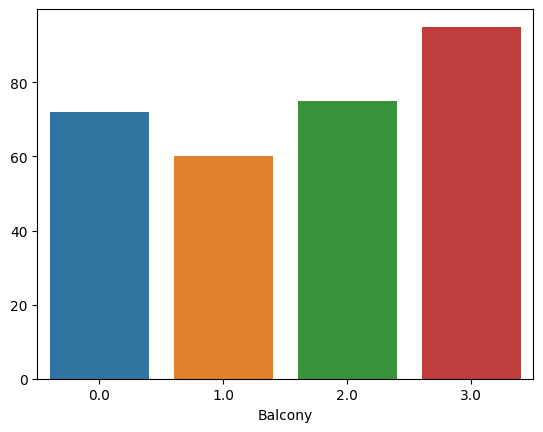

In [57]:
temp=df5.groupby("Balcony")["Price"].median()
sns.barplot(x=temp.index,y=temp.values)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

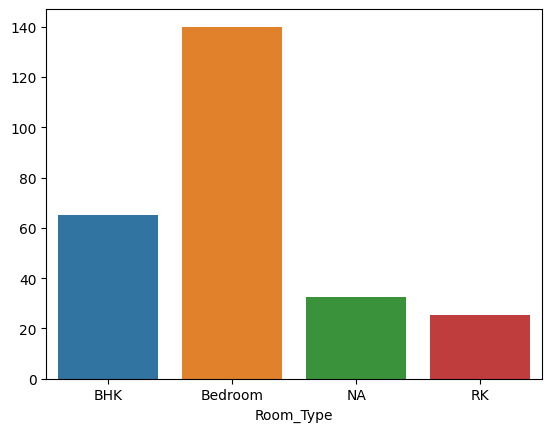

In [58]:
temp=df5.groupby("Room_Type")["Price"].median()
sns.barplot(x=temp.index,y=temp.values)
plt.show


In [59]:
df6=df5.copy()
df6.head()

,Area_Type,Availability,Location,Total_Sqft,Bath,Balcony,Price,Room,Room_Type
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,BHK
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,BHK


In [60]:
df6["price_per_sqft"]=df6["Price"]/df6["Total_Sqft"]


<function matplotlib.pyplot.show(close=None, block=None)>

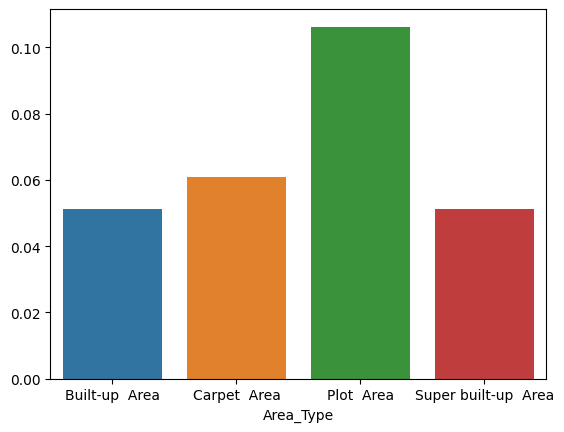

In [61]:
temp=df6.groupby("Area_Type")["price_per_sqft"].median()
sns.barplot(x=temp.index,y=temp.values)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

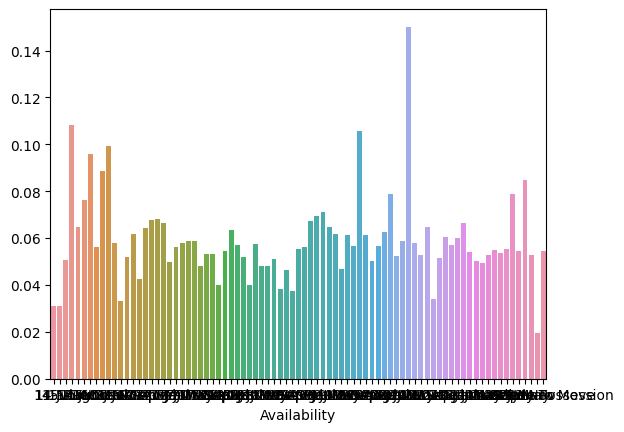

In [62]:
temp=df6.groupby("Availability")["price_per_sqft"].median()
sns.barplot(x=temp.index,y=temp.values)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

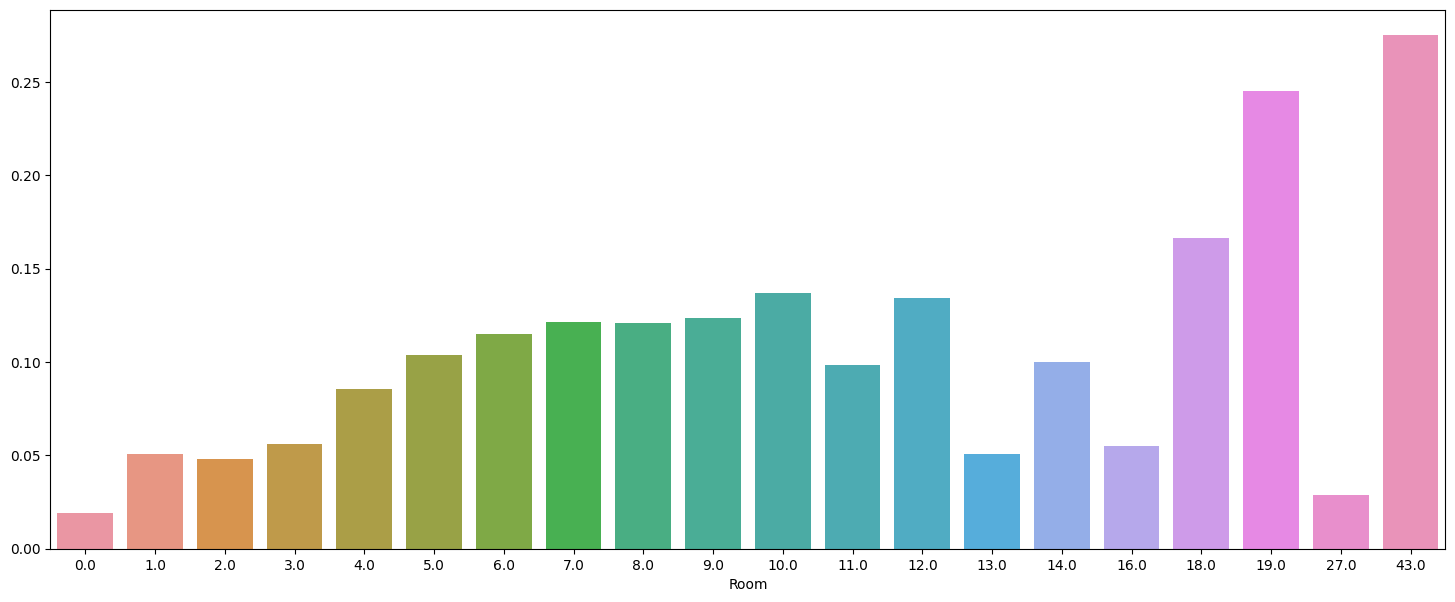

In [63]:
plt.figure(figsize=(18,7))
temp=df6.groupby("Room")["price_per_sqft"].median()
temp.index=temp.index.astype("float")
sns.barplot(x=temp.index,y=temp.values)

plt.show


In [65]:
 #The price per sqft show a linearrelation with the number of rooms, however as seen with the price as well there are irregularities observed when the number of rooms go beyond 10.